# Introduction
#### This data set contains information about 1300 dogs collected from the tweet archive of Twitter user `@dog_rates`, also known as `WeRateDogs` and `The tweet image predictions` which is hosted on Udacity's servers,  this data contains:
> <li>tweet_id: is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921 </li>
> <li>timestamp: time when tweet is posted </li>
> <li>time_of_day: which part of day when the tweet is posted </li>
> <li>text: the tweet itself </li>
> <li>jpg_url: url of image attached to the tweet </li>
> <li>name: name of the dog </li>
> <li>stage: which breed does the dog belong to, ex:doggo, pup, woof</li>
> <li>dog_breed: which breed does the dog belong to </li>
> <li>img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) </li>
> <li>algorithm_conf: how confident the algorithm is in its prediction </li>
> <li>prediction algorithm: the chosen algorithm </li>
> <li>full_rating: rate of the dog chosen by dog's owner </li>
> <li>rating_numerator: numerator part of the rating </li>
> <li>retweet_count </li>
> <li>favorite_count </li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1304 non-null   int64  
 1   timestamp             1304 non-null   object 
 2   text                  1304 non-null   object 
 3   jpg_url               1304 non-null   object 
 4   name                  1304 non-null   object 
 5   stage                 1304 non-null   object 
 6   dog_breed             1304 non-null   object 
 7   img_num               1304 non-null   object 
 8   algorithm_conf        1304 non-null   float64
 9   prediction_algorithm  1304 non-null   object 
 10  full_rating           1304 non-null   object 
 11  rating_numerator      1304 non-null   float64
 12  retweet_count         1304 non-null   int64  
 13  favorite_count        1304 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 142.8+ KB


In [3]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Afternoon','Evening','Night']
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_of_day'] = pd.cut(df['timestamp'].dt.hour, bins=b, labels=l, include_lowest=True)

In [4]:
df[['stage','img_num','dog_breed','prediction_algorithm','time_of_day']]= df[[
    'stage','img_num','dog_breed','prediction_algorithm','time_of_day']].astype('category')

In [5]:
required_columns = ['tweet_id','timestamp','time_of_day','text','jpg_url','name','stage','dog_breed','img_num','algorithm_conf'
                    ,'prediction_algorithm','full_rating','rating_numerator','retweet_count','favorite_count']
df = df.reindex(columns=required_columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1304 non-null   int64              
 1   timestamp             1304 non-null   datetime64[ns, UTC]
 2   time_of_day           1304 non-null   category           
 3   text                  1304 non-null   object             
 4   jpg_url               1304 non-null   object             
 5   name                  1304 non-null   object             
 6   stage                 1304 non-null   category           
 7   dog_breed             1304 non-null   category           
 8   img_num               1304 non-null   category           
 9   algorithm_conf        1304 non-null   float64            
 10  prediction_algorithm  1304 non-null   category           
 11  full_rating           1304 non-null   object             
 12  rating

# Univariate Exploration

## Categorical Variables :

### The Distribution of Breeds of Dogs
- The Data Set contains about 111 Breed of Dogs and it will be too much if we plot all 111 breeds so we will choose the highest 10 breeds and plot them

In [7]:
df.dog_breed.value_counts().to_frame()

dog_breed
golden_retriever          137
Labrador_retriever         78
Pembroke                   74
Chihuahua                  68
pug                        45
...                       ...
redbone                     1
silky_terrier               1
standard_schnauzer          1
toy_terrier                 1
Scotch_terrier              1

[111 rows x 1 columns]

In [8]:
print("The Data Set contains about {} Breed of Dogs so we will choose highest 10 breeds"\
      .format(df.dog_breed.value_counts().count()))

The Data Set contains about 111 Breed of Dogs so we will choose highest 10 breeds


#### Comment: The Data Set contains about 111 Breed of Dogs so we will choose highest 10 breeds

In [9]:
dog_breed_value_counts = df.dog_breed.value_counts().to_frame()
dog_breed_value_counts.rename(columns={'dog_breed':'value_counts'},inplace=True)
dog_breed_value_counts.index.name='dog_breed'
dog_breed_value_counts.head(10)

value_counts
dog_breed                       
golden_retriever             137
Labrador_retriever            78
Pembroke                      74
Chihuahua                     68
pug                           45
chow                          40
Samoyed                       39
Pomeranian                    34
toy_poodle                    32
cocker_spaniel                28

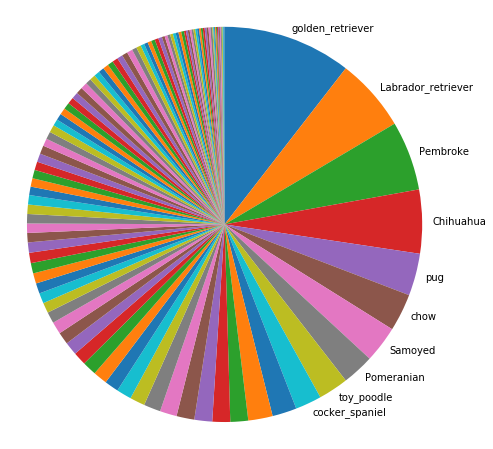

In [10]:
plt.figure(figsize=(8,8))
labels_list = np.full(len(dog_breed_value_counts.index),"",dtype=object)
labels_list[0:10] = dog_breed_value_counts.index[0:10]
plt.pie(dog_breed_value_counts.value_counts, labels = labels_list, startangle = 90,
        counterclock = False,labeldistance=1.05);
plt.axis('square');

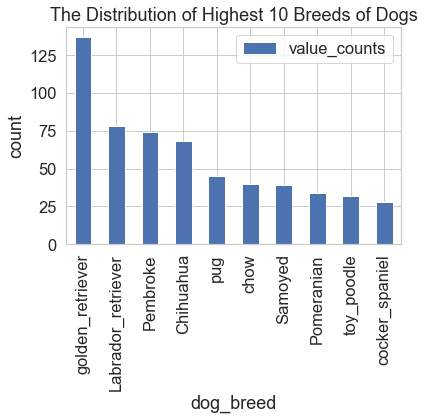

In [53]:
dog_breed_value_counts.head(10).plot(kind='bar');
plt.title('The Distribution of Highest 10 Breeds of Dogs');
plt.ylabel('count');
plt.grid(True);

In [12]:
def category_plot(df, str_category, str_title):
    type_counts = df[str_category].value_counts()
    plt.figure(figsize=(10,8))
    sns.set(style="whitegrid", font_scale=1.5); 
    sns.countplot(data = df, x = str_category, color = 'tab:blue', order=type_counts.index);
    n_points = df.shape[0]
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        #get the text property for the label to get the correct count
        count = type_counts[label.get_text()]
        count_string = '{:,}'.format(count)
        pct_string = '{:0.2f}%'.format(100*count/n_points)
        full_string = count_string + ' (' + pct_string + ')' 

        # print the annotation just below the top of the bar
        plt.text(loc, count+10, full_string, fontsize=13, ha = 'center')
    plt.title(str_title);

### The Distribution of Stages of Dogs :

In [13]:
stage_value_counts = df.stage.value_counts().to_frame()
stage_value_counts.rename(columns={'stage':'value_counts'},inplace=True)
stage_value_counts.index.name='stage'
stage_value_counts

value_counts
stage                     
unclassified           908
pup                    346
doggo                   41
floofer                  5
woof                     4

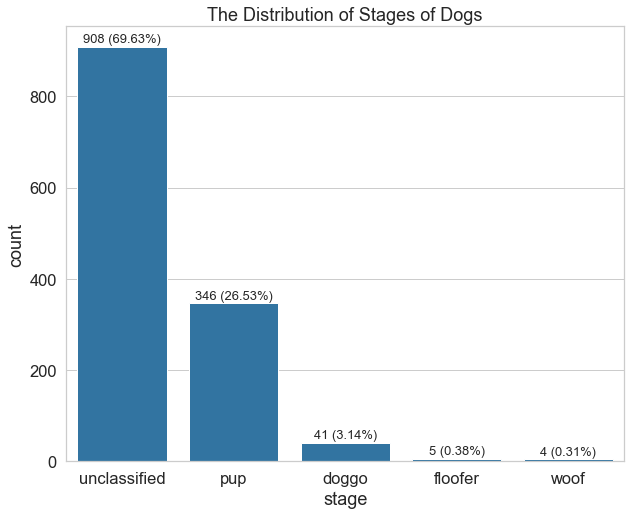

In [14]:
category_plot(df, 'stage', 'The Distribution of Stages of Dogs')

### The Distribution of Prediction Algorithms :

In [15]:
prediction_algorithm_value_counts = df.prediction_algorithm.value_counts().to_frame()
prediction_algorithm_value_counts.rename(columns={'prediction_algorithm':'value_counts'},inplace=True)
prediction_algorithm_value_counts.index.name='prediction_algorithm'
prediction_algorithm_value_counts

value_counts
prediction_algorithm              
P_1                           1148
P_2                            106
P_3                             50

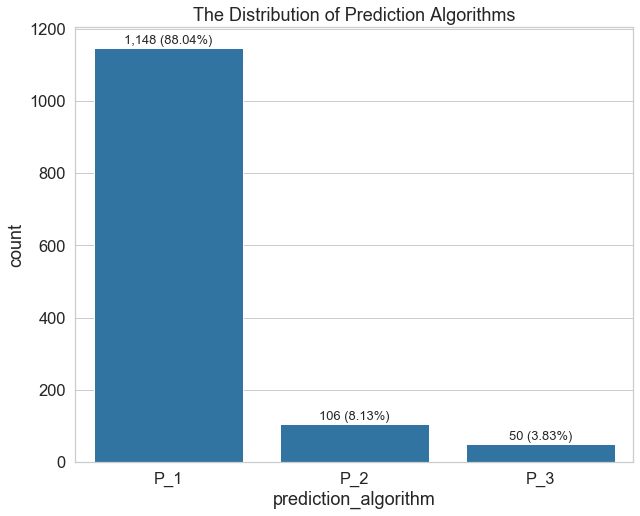

In [16]:
category_plot(df, 'prediction_algorithm', 'The Distribution of Prediction Algorithms')

### The Distribution of Images Number :

In [17]:
img_num_value_counts = df.img_num.value_counts().to_frame()
img_num_value_counts.rename(columns={'img_num':'value_counts'},inplace=True)
img_num_value_counts.index.name='img_num'
img_num_value_counts

value_counts
img_num              
img_1            1082
img_2             148
img_3              52
img_4              22

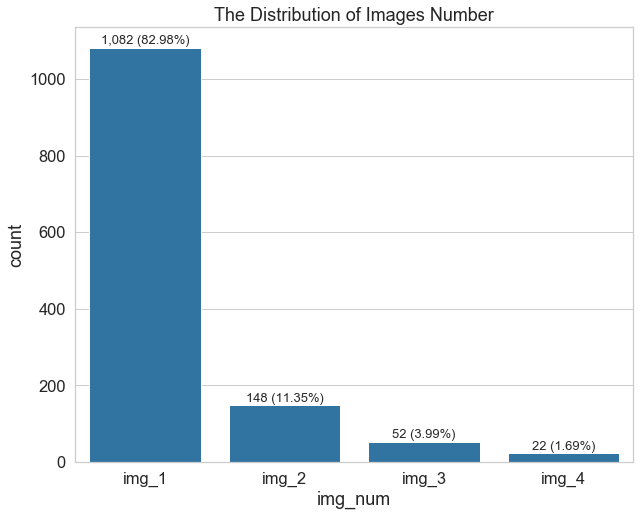

In [18]:
category_plot(df, 'img_num', 'The Distribution of Images Number')

### The Distribution of Times of Day :

In [19]:
time_of_day_value_counts = df.time_of_day.value_counts().to_frame()
time_of_day_value_counts.rename(columns={'time_of_day':'value_counts'},inplace=True)
time_of_day_value_counts.index.name='time_of_day'
time_of_day_value_counts

value_counts
time_of_day                
Late Night              640
Evening                 271
Afternoon               217
Night                   164
Early Morning            12
Morning                   0

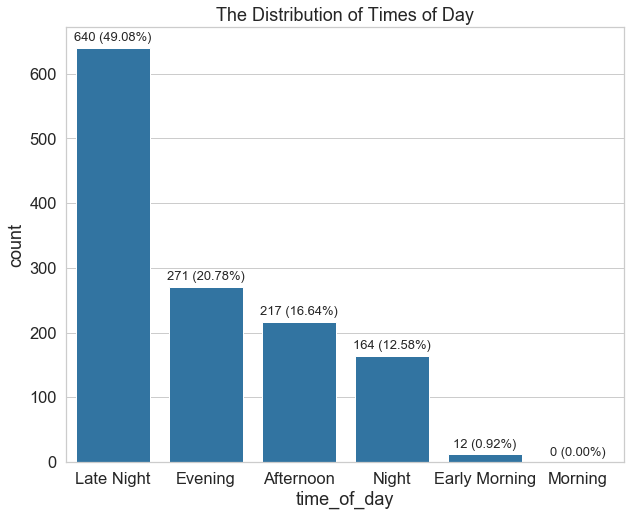

In [20]:
category_plot(df, 'time_of_day', 'The Distribution of Times of Day')

#### Comment: 
- about `49.08 %` of tweets is posted at `Late Night`
- about `20.78 %` of tweets is posted at `Evening`
- about `16.64 %` of tweets is posted at `Afternoon`
- about `12.58 %` of tweets is posted at `Night`
- about `0.92 %` of tweets is posted at `Early Morning`
- no tweet is posted at `Morning`

## Numerical Variables :

In [21]:
df.describe()

tweet_id  algorithm_conf  rating_numerator  retweet_count  \
count  1.304000e+03     1304.000000       1304.000000    1304.000000   
mean   7.546622e+17        0.559266         11.165475    2983.199387   
std    6.977929e+16        0.296496          1.797979    4427.091745   
min    6.726223e+17        0.000062          0.000000      73.000000   
25%    6.888226e+17        0.319794         10.000000     793.750000   
50%    7.280412e+17        0.568799         11.000000    1672.000000   
75%    8.164270e+17        0.829344         12.000000    3419.250000   
max    8.921774e+17        0.999953         34.000000   56561.000000   

       favorite_count  
count     1304.000000  
mean      9743.056748  
std      12747.669737  
min          0.000000  
25%       2407.000000  
50%       4710.500000  
75%      12703.250000  
max     132712.000000

### Retweet Count Distribution:

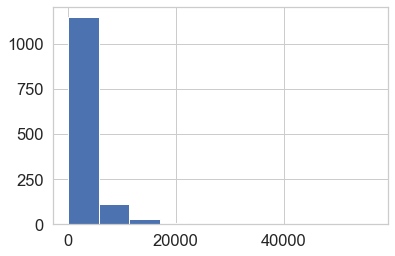

In [22]:
plt.hist(data=df, x='retweet_count');

#### Comment:
- `log` scale and set new bins will be a good solution for highly skewed distribution

In [23]:
np.log10(df[['retweet_count','favorite_count']].describe())

C:\Users\El Zahraa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


retweet_count  favorite_count
count       3.115278        3.115278
mean        3.474682        3.988695
std         3.646119        4.105431
min         1.863323            -inf
25%         2.899684        3.381476
50%         3.223236        3.673067
75%         3.533931        4.103915
max         4.752517        5.122910

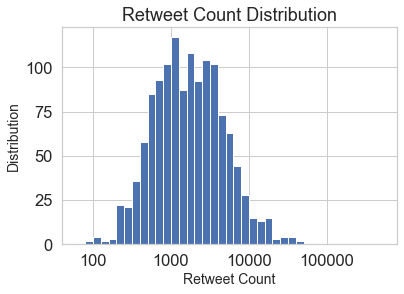

In [24]:
bins_edge = 10**np.arange(1.8, np.log10(df.retweet_count.max())+1, 0.1)
plt.hist(data=df, x='retweet_count', bins=bins_edge);
ticks = [10**x for x in range(2,6)]
labels = ['{}'.format(x) for x in ticks]
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlabel('Retweet Count', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.title('Retweet Count Distribution');
plt.show();

#### Comment: Distribution of Retweet Count is unimodal and symmetric, it has about the same shape on either side of the middle.

### Favorite Count Distribution:

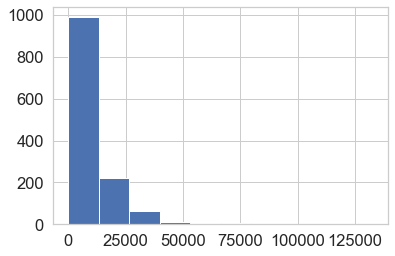

In [25]:
plt.hist(data=df, x='favorite_count');

#### Comment:
- `log` scale and set new bins will be a good solution for highly skewed distribution

In [26]:
np.log10(df.favorite_count.drop_duplicates().nsmallest(5))

C:\Users\El Zahraa\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


29          -inf
1234    2.796574
1199    2.797268
1243    2.824126
1275    2.840733
Name: favorite_count, dtype: float64

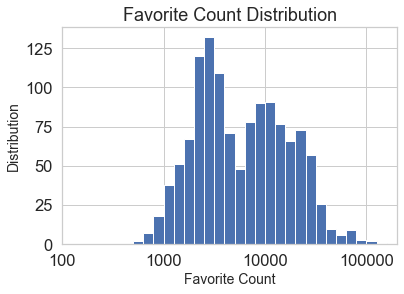

In [27]:
bins_edge = 10**np.arange(2.7, np.log10(df.favorite_count.max())+1, 0.1)
plt.hist(data=df, x='favorite_count', bins=bins_edge); #favorite_count
plt.xscale('log');
ticks = [10**x for x in range(2,6)]
labels = ['{}'.format(x) for x in ticks]
plt.xscale('log');
plt.xlim(right=10**5+10**5);
plt.xticks(ticks, labels);
plt.xlabel('Favorite Count', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.title('Favorite Count Distribution');
plt.show();

#### Comment: Distribution of Favorite Count is roughly bimodal and skewed to right, with one large peak somewhere between 4 and 5 thousand, and a second median peak about 10 thousand.

### Rating Numerator Distribution:

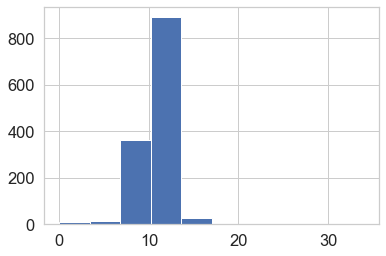

In [28]:
plt.hist(data=df, x='rating_numerator');

#### Comment:
- limit x-axis and set new bins

In [29]:
df.rating_numerator.value_counts()

12.00    385
11.00    282
10.00    232
13.00    221
9.00      84
8.00      33
14.00     25
7.00      14
5.00       7
6.00       7
2.00       4
3.00       4
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
34.00      1
Name: rating_numerator, dtype: int64

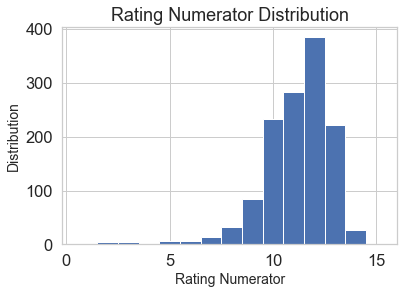

In [30]:
bins_edge = np.arange(df.rating_numerator.min(), 14+1, 1)
plt.hist(data=df, x='rating_numerator', bins=bins_edge+0.5);
plt.xlim(right=16);
plt.xlabel('Rating Numerator', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.title('Rating Numerator Distribution');

#### Comment 1 : Distribution of Rating is unimodal and skewed to left
#### Comment 2 : Rating is based on dog's owner not audience, so it won't be fair if we use rating variable to determine best dog rating. also, we shouldn't involve rating variable in bivariate exploration or multivariate exploration 

# Bivariate Exploration

### Average Confidance for Prediction Algorithms :

In [31]:
df.groupby(['prediction_algorithm'])[['algorithm_conf']].mean()

algorithm_conf
prediction_algorithm                
P_1                         0.621783
P_2                         0.122478
P_3                         0.049857

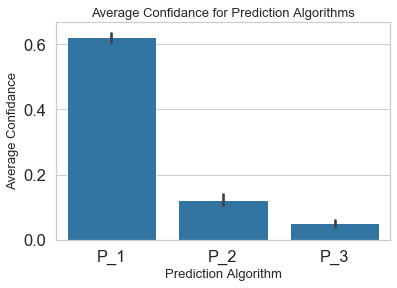

In [32]:
sns.barplot(x='prediction_algorithm', y='algorithm_conf', data=df, color = 'tab:blue');
plt.xlabel('Prediction Algorithm', fontsize=13);
plt.ylabel('Average Confidance', fontsize=13);
plt.title('Average Confidance for Prediction Algorithms', fontsize=13);

#### Comment: from `The Distribution of Prediction Algorithms` and `Average Confidance for Prediction Algorithms` :
- #1 prediction algorithm got involved in about 88.04 % in predicting the most correct breed with average confidance about 62 %
- #2 prediction algorithm got involved in about 8.13 % in predicting the most correct breed with average confidance about 12 %
- #3 prediction algorithm got involved in about 3.83 % in predicting the most correct breed with average confidance about 5 %

### Average Confidance for Image Number :

In [33]:
df.groupby(['img_num'])[['algorithm_conf']].mean()

algorithm_conf
img_num                
img_1          0.540728
img_2          0.631417
img_3          0.625300
img_4          0.829510

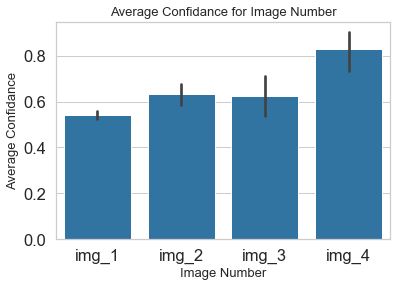

In [34]:
sns.barplot(x='img_num', y='algorithm_conf', data=df, color = 'tab:blue');
plt.xlabel('Image Number', fontsize=13);
plt.ylabel('Average Confidance', fontsize=13);
plt.title('Average Confidance for Image Number', fontsize=13);

#### Comment: from `The Distribution of Images Number` and `Average Confidance for Image Number` :
- about 83 % of image #1 has average confidance about 54 %
- about 11.35 % of image #2 has average confidance about 63 %
- about 4 % of image #3 has average confidance about 62.5 %
- about 1.7 % of image #4 has average confidance about 83 %

### Prediction Algorithms and Image Number:

In [35]:
df.groupby(['img_num','prediction_algorithm'])[['prediction_algorithm']].count().fillna(0)

prediction_algorithm
img_num prediction_algorithm                      
img_1   P_1                                  952.0
        P_2                                   90.0
        P_3                                   40.0
img_2   P_1                                  132.0
        P_2                                   10.0
        P_3                                    6.0
img_3   P_1                                   43.0
        P_2                                    6.0
        P_3                                    3.0
img_4   P_1                                   21.0
        P_2                                    0.0
        P_3                                    1.0

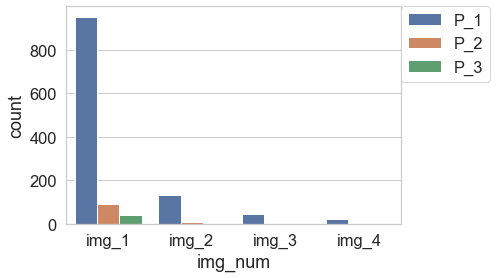

In [36]:
sns.countplot(data = df, x = 'img_num', hue='prediction_algorithm', order=df.img_num.value_counts().index);
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

#### Comment:
- the most used image in all algorithms is the first image (img_1)

### Relation between Retweet Count and Favorite Count:

In [37]:
df[['retweet_count','favorite_count']].corr()

retweet_count  favorite_count
retweet_count        1.000000        0.846324
favorite_count       0.846324        1.000000

#### Comment: strong positive correlation between these two variables

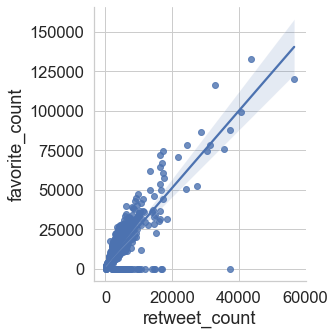

In [38]:
sns.lmplot(x="retweet_count", y="favorite_count", data = df);

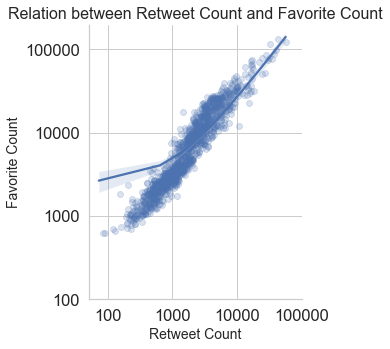

In [39]:
sns.lmplot(x="retweet_count", y="favorite_count", data = df,scatter_kws = {'alpha':0.2});
plt.xscale('log');
plt.yscale('log');
xlocs = [10**x for x in range(2,6)]
xlabels = ['{}'.format(x) for x in ticks]
ylocs = [10**x for x in range(2,6)]
ylabels = ['{}'.format(x) for x in ticks]
plt.xticks(xlocs, xlabels);
plt.yticks(ylocs, ylabels);
plt.xlabel('Retweet Count', fontsize=14);
plt.ylabel('Favorite Count', fontsize=14);
plt.title('Relation between Retweet Count and Favorite Count', fontsize=16);
plt.show();

#### Comment: Retweet Count is proportional to Favorite Count as shown, and this confirms the positive correlation between these two variables

### Relation between Retweet Count and Times of Day:

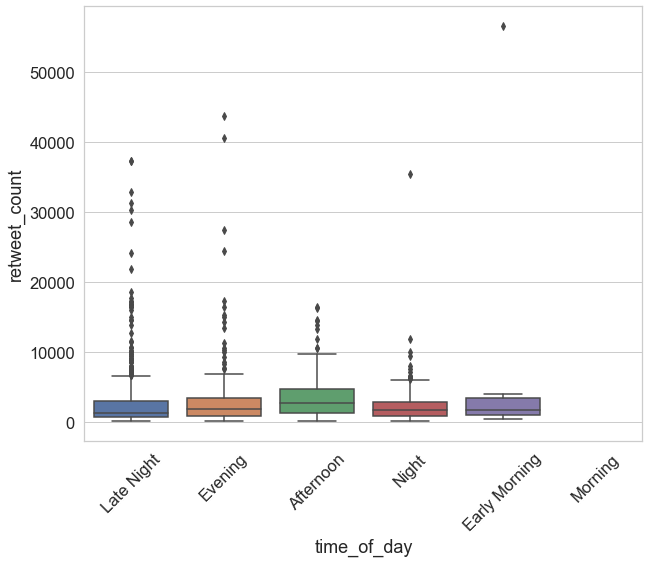

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = 'time_of_day', y='retweet_count', order=df.time_of_day.value_counts().index);
plt.xticks(rotation=45);

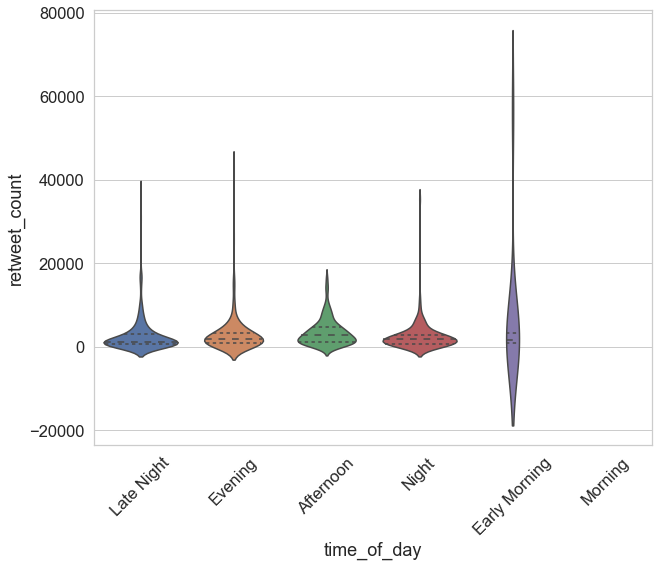

In [41]:
plt.figure(figsize=(10,8))
sns.violinplot(data = df, x = 'time_of_day', y='retweet_count', order=df.time_of_day.value_counts().index, inner='quartile');
plt.xticks(rotation=45);

### Relation between Favorite Count and Times of Day:

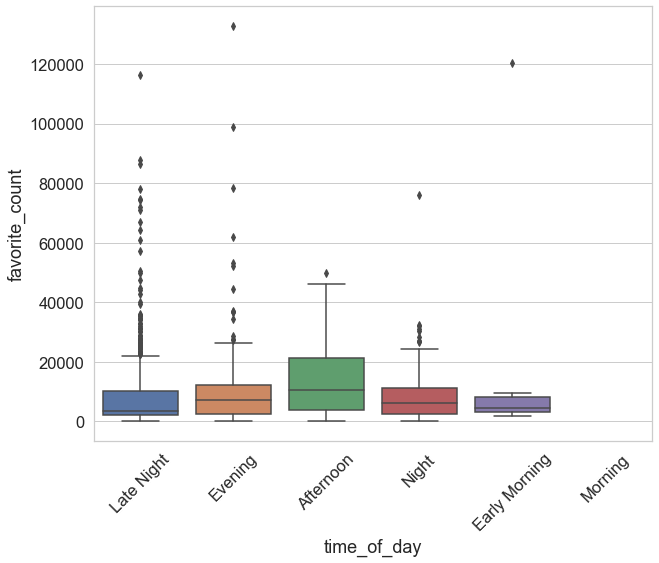

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = 'time_of_day', y='favorite_count', order=df.time_of_day.value_counts().index);
plt.xticks(rotation=45);

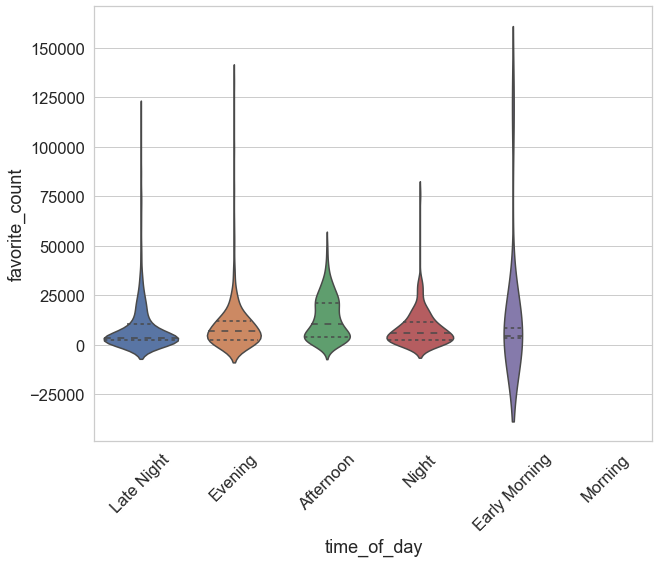

In [43]:
plt.figure(figsize=(10,8))
sns.violinplot(data = df, x = 'time_of_day', y='favorite_count', order=df.time_of_day.value_counts().index, inner='quartile');
plt.xticks(rotation=45);

### Relation between Retweet Count and Stages of Dogs:

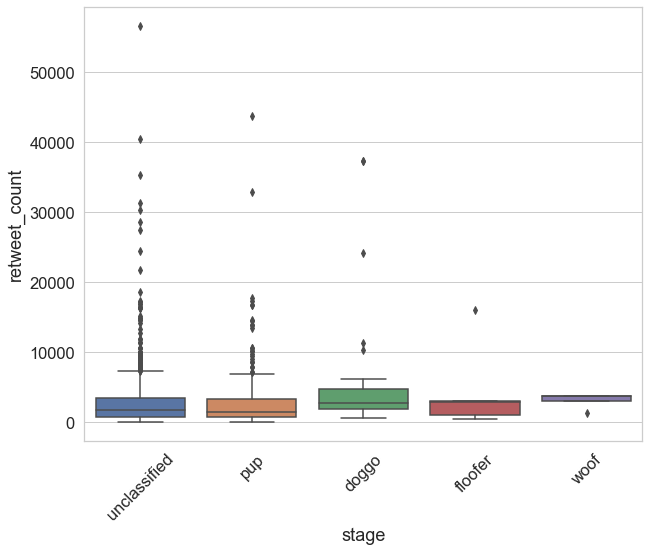

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = 'stage', y='retweet_count', order=df.stage.value_counts().index);
plt.xticks(rotation=45);

### Relation between Favorite Count and Stages of Dogs:

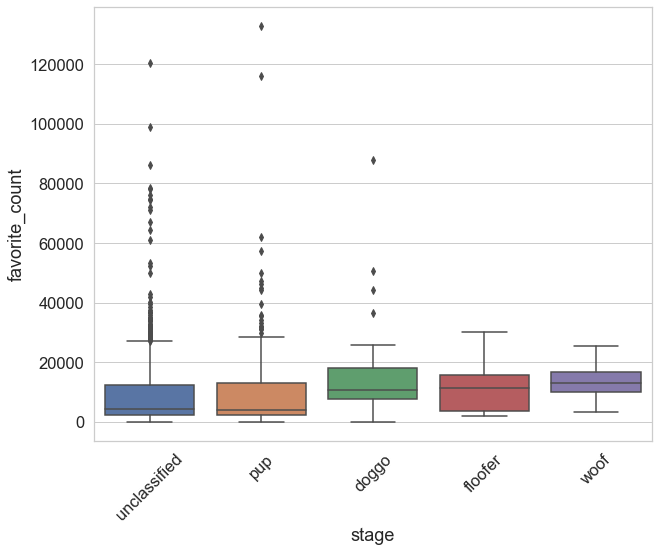

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = 'stage', y='favorite_count', order=df.stage.value_counts().index);
plt.xticks(rotation=45);

### Relation between Retweet Count and Times of Day:

C:\Users\El Zahraa\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


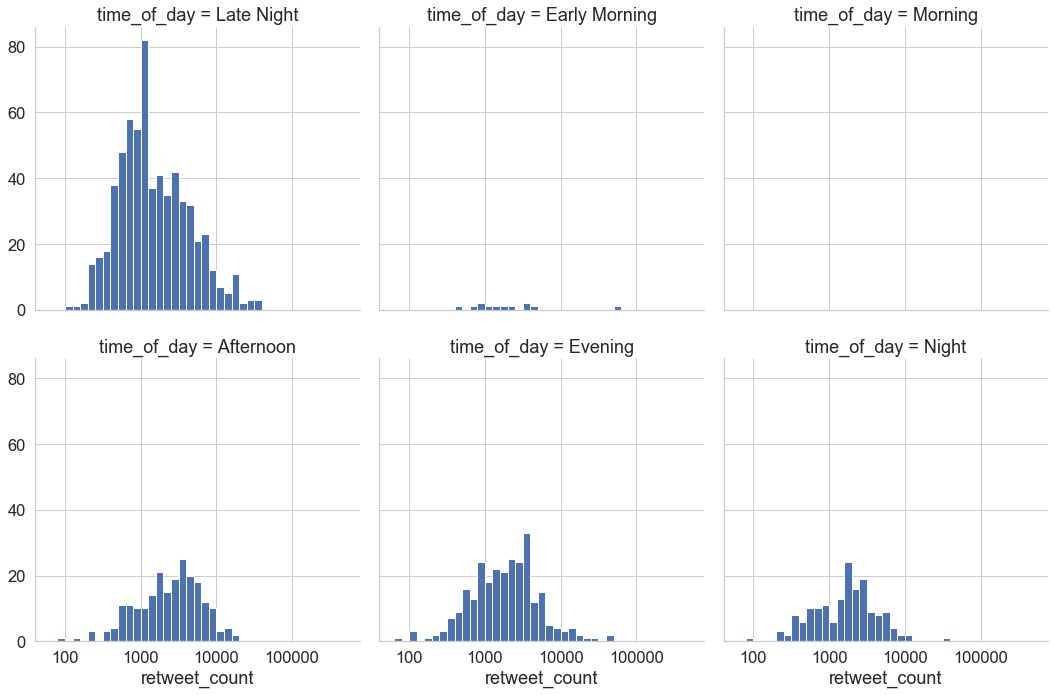

In [46]:
g = sns.FacetGrid(data = df, col = 'time_of_day', col_wrap = 3, size = 5)
bins_edge = 10**np.arange(1.8, np.log10(df.retweet_count.max())+1, 0.1)
g.map(plt.hist, 'retweet_count', bins=bins_edge);
ticks = [10**x for x in range(2,6)]
labels = ['{}'.format(x) for x in ticks]
g.set(xscale='log');
g.set(xticks=ticks, xticklabels=labels);

### Relation between Favorite Count and Times of Day:

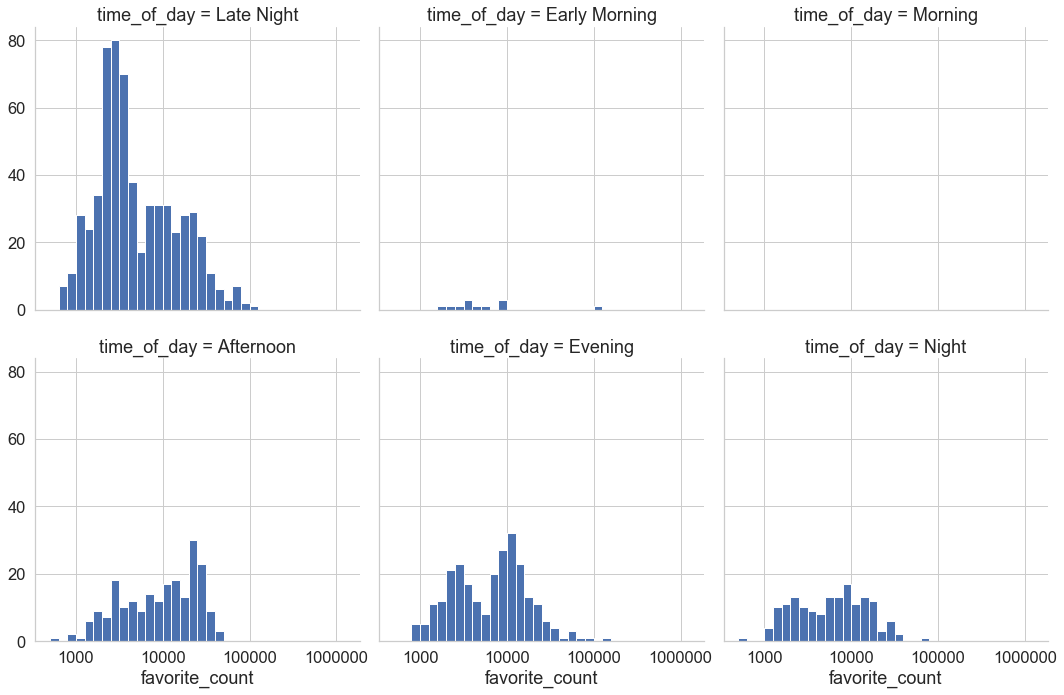

In [47]:
g = sns.FacetGrid(data = df, col = 'time_of_day', col_wrap = 3, size = 5)
bins_edge = 10**np.arange(2.7, np.log10(df.favorite_count.max())+1, 0.1)
g.map(plt.hist, 'favorite_count', bins=bins_edge);
ticks = [10**x for x in range(3,7)]
labels = ['{}'.format(x) for x in ticks]
g.set(xscale='log');
g.set(xticks=ticks, xticklabels=labels);

# Multivariate exploration

### Average Confidance corresponding to Prediction Algorithms and Image Number:

In [48]:
df.groupby(['img_num','prediction_algorithm'])[['algorithm_conf']].mean().fillna(0)

algorithm_conf
img_num prediction_algorithm                
img_1   P_1                         0.599751
        P_2                         0.132459
        P_3                         0.054584
img_2   P_1                         0.702210
        P_2                         0.056392
        P_3                         0.032339
img_3   P_1                         0.744472
        P_2                         0.082903
        P_3                         0.001966
img_4   P_1                         0.863793
        P_2                         0.000000
        P_3                         0.109570

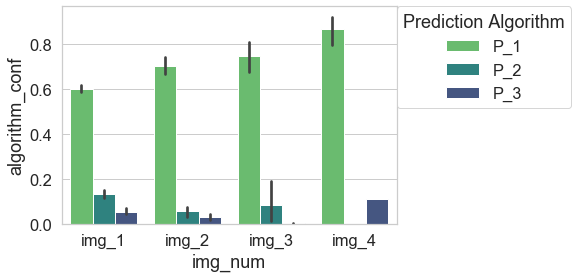

In [49]:
sns.barplot(data = df, x='img_num' , y='algorithm_conf', hue='prediction_algorithm', palette = 'viridis_r',
            order=df.img_num.value_counts().index);
plt.legend(title = 'Prediction Algorithm',bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

#### Comment:
- the fourth image has the highest average confidance about `86 %` achieved by #1 algorithm. 

### Times of Day corresponding to Retweet Count and Favorite Count :

C:\Users\El Zahraa\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


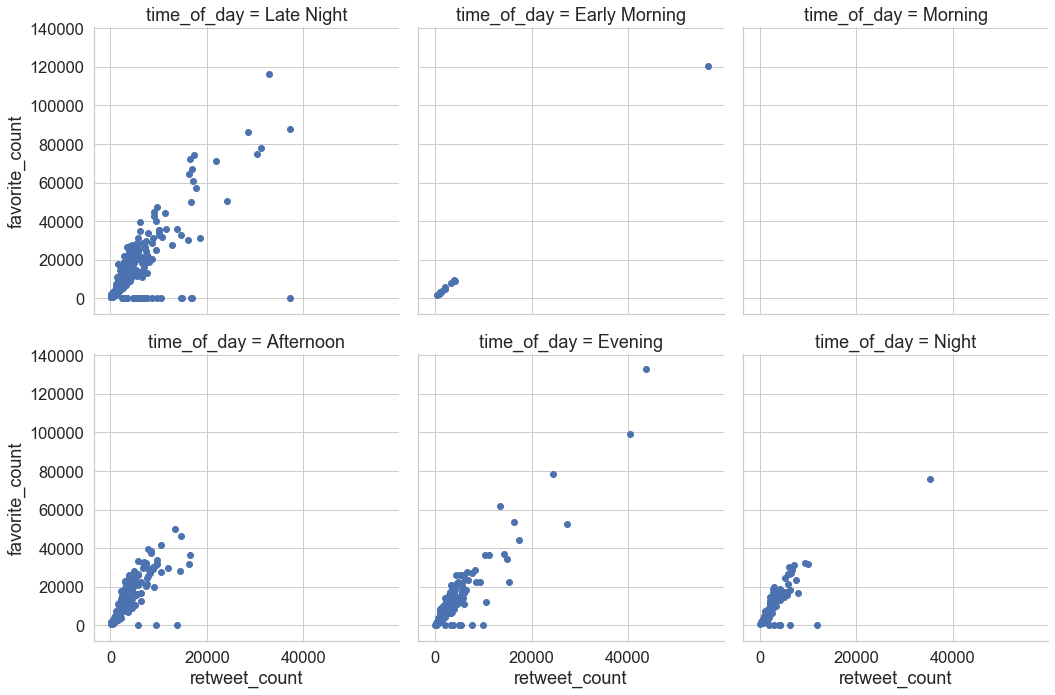

In [50]:
g = sns.FacetGrid(df, col="time_of_day", col_wrap = 3, size = 5);
g = g.map(plt.scatter, "retweet_count", "favorite_count");

C:\Users\El Zahraa\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


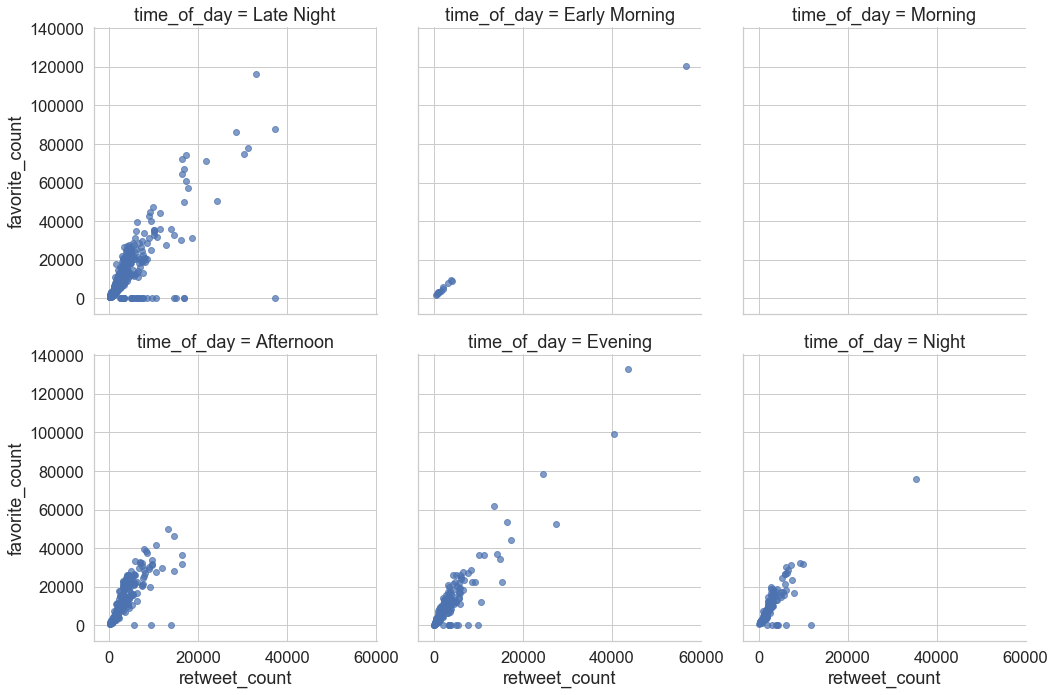

In [51]:
sns.lmplot(x="retweet_count", y="favorite_count", data = df,scatter_kws = {'alpha':0.7},col='time_of_day', col_wrap=3,
           size=5, fit_reg=False);

### Stages of Dogs corresponding to Retweet Count and Favorite Count :

In [52]:
sns.lmplot(x="retweet_count", y="favorite_count", data = df,scatter_kws = {'alpha':0.7},col='stage', col_wrap=3,
           size=5, fit_reg=False);